神经网络

- 感知机中设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的

- 而神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数

激活函数

- 激活函数的作用在于决定如何来激活输入信号的总和

- 阶段函数：一旦输入超过阈值，就切换输出

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

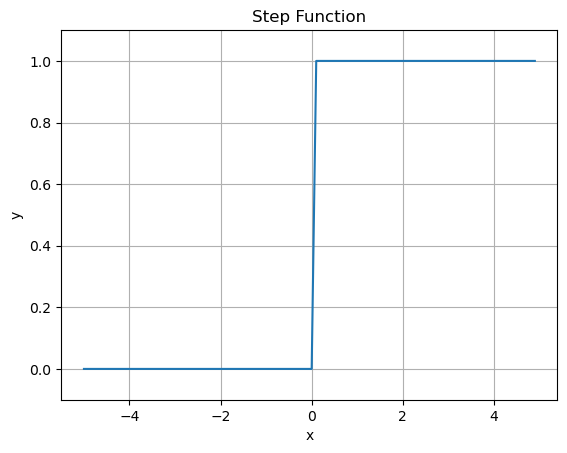

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int_)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 设置 y 轴范围
plt.title("Step Function")  # 添加标题
plt.xlabel("x")  # x 轴标签
plt.ylabel("y")  # y 轴标签
plt.grid(True)  # 显示网格
plt.show()

- sigmoid函数：h(x) = 1/(1 + exp(-x))

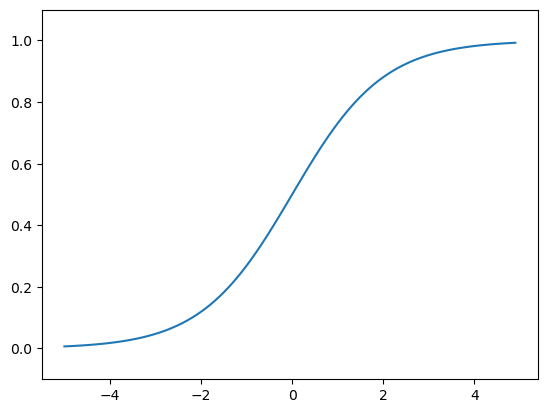

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

sigmoid函数和阶跃函数的比较

- “平滑度”不同：sigmoid函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0为界，输出发生急剧性的变化。sigmoid函数的平滑性对神经网路的学习具有重要意义

- sigmoid函数可以返回0.731…、0.880…等实数，而感知机中神经元之间流动的是0或1的二次信号

非线性函数

- 神经网络的激活函数必须使用非线性函数。因为使用线性函数的话，加深神经网络的层数就没有意义了

ReLU函数

- ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输出0

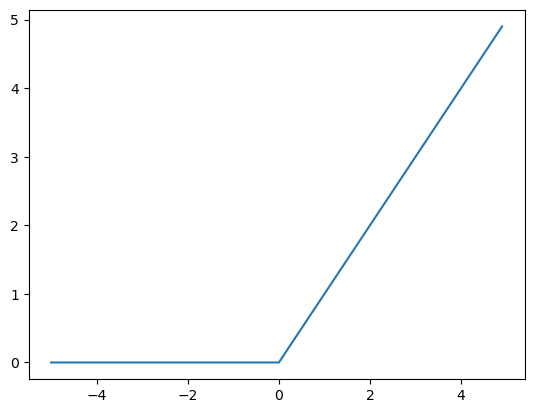

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

矩阵乘法

In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B) #np.dot()接收两个Numpy数组作为参数，并返回数组的乘积

array([[19, 22],
       [43, 50]])

神经网络的内积

In [14]:
X = np.array([1, 2])
X.shape
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
Y.shape
print(Y)

[ 5 11 17]


3层神经网络的实现

- $w^{(1)}_{12}$右上角的$(1)$表示权重和神经元的层号（即第1层的权重、第1层的神经元），右下角有两个数字，它们是后一层的神经元和前一层的神经元的索引号，按照“后一层的搜引号、前一层的索引号”的顺序排序

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

def identity_function(x):   #恒等函数
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


- 输出层所用的激活函数，要根据求解问题的性质决定。一般地，回归问题可以使用恒等函数，二分类问题可以使用sigmoid函数，多元分类问题可以使用softmax函数。

分类问题与回归问题

- 分类问题是数据属于哪一个类别的问题。回归问题是根据某个输入预测一个（连续的）数值的问题

- 一般而言，分类问题用softmax函数，回归问题用恒等函数

恒等函数与sofymax函数

- 恒等函数会将输入按原养输出，对于输入的信息，不加以任何改动地直接输出

- softmax函数可以用下面的式表示：
$y_k=\dfrac{exp(a_k)}{\sum\limits_{i=1}^nexp(a_i)}$

- 上式表示假设输出层共有$n$个神经元，计算第k个神经元的输出$y_k$

- softmax函数的分子式输入信号$a_k$的指数函数，分母式所有输入信号的指数函数的和

In [2]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)   #指数函数
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [4]:
import numpy as np
def sofxmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

- 实现softmax函数时要注意溢出问题。因为softmax函数的实现中要进行指数函数的计算，此时指数函数的值很容易变得非常大

- 改进：在分子和分母上都乘上C这个任意的常数（因为同时对分母和分子乘以相同的常数，所以计算结果不变）。然后，把这个C移动到指数函数（exp）中，记作logC。最后，把logC替换为另一个符号C'

- 为防止溢出，一般会使用输入信号中的最大值

In [6]:
import numpy as np

a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))    #softmax函数的运算 

c = np.max(a)
print(a - c)

print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\Arnold\AppData\Local\Temp\ipykernel_8016\2865892880.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))    #softmax函数的运算
C:\Users\Arnold\AppData\Local\Temp\ipykernel_8016\2865892880.py:4: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))    #softmax函数的运算


- 如该例所示，通过减去输入信号中的最大值（上例中的c），可以发现原来本为nan(not a number,不确定)的地方，现在被正确计算了。综上，我们可以像下面这样实现softmax函数

In [7]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   #溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

softmax函数的特则

In [8]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   #溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = sofxmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 如上所示，softmax函数的输出是0.0到1.0之间的实数。并且，softmax函数的输出值的总和是1。输出总和为1是softmax函数的一个重要特征。正因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”

- 需要注意的是，即便使用了softmax函数，各个元素之间的大小关系也不会改变。这是因为指数函数(y = exp(x))是单调递增函数

- 神经网络在进行分类时，输出层的softmax函数可以省略

预处理在神经网路（深度学习）中非常实用，其有效性已在提高识别性能和学习的效率等众多实验中得到验证

- 正规化 (normalization)：将数据限定到某个范围内的处理

- 数据白化(whitening)：将数据整体的分布形状均匀化

批处理

- 批处理对计算机的运算大有利处，可以大幅缩短每张图像的处理时
间。那么为什么批处理可以缩短处理时间呢？这是因为大多数处理
数值计算的库都进行了能够高效处理大型数组运算的最优化。并且，
在神经网络的运算中，当数据传送成为瓶颈时，批处理可以减轻数
据总线的负荷（严格地讲，相对于数据读入，可以将更多的时间用在
计算上）。也就是说，批处理一次性计算大型数组要比分开逐步计算
各个小型数组速度更快